## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

####
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#####
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

## Load Data

In [2]:
df_users =  pd.read_csv("takehome_users.csv",encoding = "ISO-8859-1")
df_engagement =  pd.read_csv("takehome_user_engagement.csv",parse_dates =["time_stamp"], index_col ="time_stamp")

In [3]:
print(df_users.shape)
print(df_engagement.shape)

(12000, 10)
(207917, 2)


In [4]:
df_users.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0


In [5]:
df_engagement.head(3)

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1


In [6]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
user_id    207917 non-null int64
visited    207917 non-null int64
dtypes: int64(2)
memory usage: 4.8 MB


In [8]:
print("Unique users Count: ", df_users.object_id.nunique())

Unique users Count:  12000


## Feature Extraction

In [9]:
df_engagement.visited.value_counts()

1    207917
Name: visited, dtype: int64

visited = 1 for all the records.

#### 1. Total_Logins

In [10]:
df_users["Total_Logins"] = df_engagement.groupby('user_id')["visited"].sum()

#### 2. Adopted_User

Now, let's take a deeper look at login times for a particular user, say user_id = 2

In [11]:
df_engagement[df_engagement.user_id ==2]

,user_id,visited
time_stamp,,
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
2013-12-31 03:45:04,2,1
2014-01-08 03:45:04,2,1
2014-02-03 03:45:04,2,1
2014-02-08 03:45:04,2,1
2014-02-09 03:45:04,2,1


#### Resample the date weekwise

In [12]:
# True if there are at least 3 logins in a week time
df = df_engagement.groupby("user_id")["visited"].resample('W').sum() >= 3

In [13]:
df = df.reset_index()
df.columns = ["user_id", "date","adopted_user"]
# Check the new df for user_id ==2
df[df.user_id ==2]

,user_id,date,adopted_user
1,2,2013-11-17,False
2,2,2013-11-24,False
3,2,2013-12-01,False
4,2,2013-12-08,False
5,2,2013-12-15,False
6,2,2013-12-22,False
7,2,2013-12-29,False
8,2,2014-01-05,False
9,2,2014-01-12,False
10,2,2014-01-19,False


In [14]:
user_list = list(sorted(df[df["adopted_user"] == True]["user_id"].unique()))

##### Check Adopted Users Count

In [15]:
len(user_list)

1445

So, there are 1445 Adopted users, as per the above calculations.

#### Add a new column "Adopted_User" in df_users

In [16]:
df_users["adopted_user"] =  [1 if x in user_list else 0 for x in df_users['object_id']] 
df_users["adopted_user"].value_counts()

0    10555
1     1445
Name: adopted_user, dtype: int64

In [17]:
df_users.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Total_Logins,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,14.0,0


## Data Wrangling

#### 1.Check for NAN values

In [18]:
df_users.columns[df_users.isna().any()].tolist()

['last_session_creation_time', 'invited_by_user_id', 'Total_Logins']

In [19]:
print("Missing Values for last creation time:", df_users.last_session_creation_time.isna().sum())
print("Missing Values for inivited by:",df_users.invited_by_user_id.isna().sum())
print("Missing Values for Total_Logins:",df_users.Total_Logins.isna().sum())

Missing Values for last creation time: 3177
Missing Values for inivited by: 5583
Missing Values for Total_Logins: 3178


#### 2. Fill NAN values

In [20]:
# last_session_creation_time
df_users['last_session_creation_time'] = df_users['last_session_creation_time'].fillna(df_users['last_session_creation_time'].median())

In [21]:
# invited_by_user_id
df_users['invited_by_user_id'] = df_users['invited_by_user_id'].fillna(0)

In [22]:
# total_visits
df_users['Total_Logins'] = df_users['Total_Logins'].fillna(0)

#### 3. Convert Data Type of Columns

In [23]:
# Convert creation_time to datetime objects
df_users['creation_time'] = pd.to_datetime(df_users['creation_time'])
# Convert creation_source to category
df_users["creation_source"] = df_users["creation_source"].astype("category")
df_users["org_id"] = df_users["org_id"].astype("category")
# Convert below features to Boolean
df_users["opted_in_to_mailing_list"] = df_users["opted_in_to_mailing_list"].astype("category")
df_users["enabled_for_marketing_drip"] = df_users["enabled_for_marketing_drip"].astype("category")
df_users["adopted_user"] = df_users["adopted_user"].astype("category")

#df_users['last_session_creation_time'] = df_users['last_session_creation_time'].astype(int)

#### 4. Discard the time part from Date Columns

In [24]:
df_users['creation_date'] =  df_users['creation_time'].dt.date

In [25]:
df_users['last_login_date'] = pd.to_datetime(df_users['last_session_creation_time'],unit='s')
df_users['last_login_date'] =  df_users['last_login_date'].dt.date

#### 5. Extract year, month and day from date column

In [26]:
df_users['creation_year'] = pd.to_datetime(df_users['creation_date']).dt.year
df_users['creation_month'] = pd.to_datetime(df_users['creation_date']).dt.month
df_users['creation_day'] = pd.to_datetime(df_users['creation_date']).dt.day

#### 6. Add a new column as a difference of two date columns

In [27]:
df_users['days_span'] = (df_users['last_login_date'] - df_users['creation_date']).dt.days

#### 7. Drop not-required columns

The Name or User_id or and Email can not be used for Building a Model. So, let's drop these features.

In [28]:
df_users = df_users.drop(['object_id','name','email','creation_time','last_session_creation_time','creation_date','last_login_date'], axis = 1)

In [29]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
creation_source               12000 non-null category
opted_in_to_mailing_list      12000 non-null category
enabled_for_marketing_drip    12000 non-null category
org_id                        12000 non-null category
invited_by_user_id            12000 non-null float64
Total_Logins                  12000 non-null float64
adopted_user                  12000 non-null category
creation_year                 12000 non-null int64
creation_month                12000 non-null int64
creation_day                  12000 non-null int64
days_span                     12000 non-null int64
dtypes: category(5), float64(2), int64(4)
memory usage: 656.6 KB


In [30]:
df_users.head(3)

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Total_Logins,adopted_user,creation_year,creation_month,creation_day,days_span
0,GUEST_INVITE,1,0,11,10803.0,0.0,0,2014,4,22,0
1,ORG_INVITE,0,0,1,316.0,1.0,1,2013,11,15,136
2,ORG_INVITE,0,0,94,1525.0,14.0,0,2013,3,19,0


### Prepare Dataset to Fit an Algorithm

In [31]:
# One-hot-encode for categorical features via .get_dummies pandas method
df_final = pd.get_dummies(df_users, columns = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip'])
df_final.head()

,org_id,invited_by_user_id,Total_Logins,adopted_user,creation_year,creation_month,creation_day,days_span,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1
0,11,10803.0,0.0,0,2014,4,22,0,1,0,0,0,0,0,1,1,0
1,1,316.0,1.0,1,2013,11,15,136,0,1,0,0,0,1,0,1,0
2,94,1525.0,14.0,0,2013,3,19,0,0,1,0,0,0,1,0,1,0
3,1,5151.0,1.0,0,2013,5,21,1,1,0,0,0,0,1,0,1,0
4,193,5240.0,1.0,0,2013,1,17,5,1,0,0,0,0,1,0,1,0


In [32]:
y = df_final['adopted_user']
X = df_final.drop(['adopted_user'], axis=1)

In [33]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=21)

In [34]:
print(X_train.shape)
print(X_test.shape)

(8400, 16)
(3600, 16)


### Logistic Regression Model

In [35]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(class_weight = 'balanced').fit(X_train,y_train)
lm

/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

#### Prediction for Logistic Regression Model

In [36]:
lm_predictions =  lm.predict(X_test)
lm_predictions

array([0, 0, 0, ..., 0, 1, 0])

#### Classification Report

In [37]:
lm_report = classification_report(y_test, lm_predictions)
print(lm_report)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3169
           1       0.47      0.80      0.59       431

   micro avg       0.87      0.87      0.87      3600
   macro avg       0.72      0.84      0.76      3600
weighted avg       0.91      0.87      0.88      3600



#### Accuracy Score

In [38]:
accuracy_score(y_test, lm_predictions)

0.8688888888888889

### Random Forest Model

In [39]:
# Random Forest Model
random_model = RandomForestClassifier(n_estimators = 1000,
                                     class_weight='balanced')

In [40]:
random_model.fit(X_train,list(y_train))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

#### Features Importance

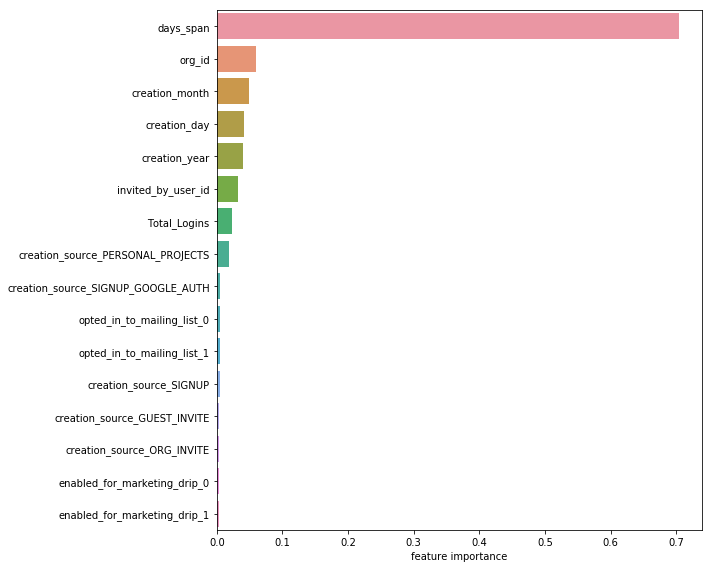

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
ranking = np.argsort(-random_model.feature_importances_)
ax = sns.barplot(x=random_model.feature_importances_[ranking][:20], y=X_train.columns.values[ranking][:20], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

#### Predictions for RandomForest Model

In [42]:
rf_predictions =  random_model.predict(X_test)
rf_predictions

array([0, 0, 0, ..., 0, 0, 0])

#### Classification Report

In [43]:
rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3169
           1       0.93      0.79      0.85       431

   micro avg       0.97      0.97      0.97      3600
   macro avg       0.95      0.89      0.92      3600
weighted avg       0.97      0.97      0.97      3600



#### Accuracy Score

In [44]:
accuracy_score(y_test, rf_predictions)

0.9672222222222222

### Observations:

1. There are a few users who have created an account, but never logged in
2. Last Login Time is before Creation Date. Now sure, how that happened.

But if we check the feature importance plot, interestingly days_span is of highest imporatnce which makes sence since that feature indicates for how long the users are login in which in turn can predict for adopted users.

There are more scope like adding new features or removing no-so-imporatnt features or even try some other classification algorithm.
